In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
 #Example data augmentation
#_______________________________________________________________________________________
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('catdog/train2/cat/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='catdog/preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20: #21 modified pictures
        break  # otherwise the generator would loop indefinitely
#________________________________________________________________________________________      


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3))) #(height,width,features=pixels)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#On top of it we stick two fully-connected layers. 
#We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. 
#To go with it we will also use the binary_crossentropy loss to train our model.

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [15]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'catdog/train2', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'catdog/train2',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'catdog/validation2',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 2002 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [16]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('model.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 55s 439ms/step - loss: 0.7062 - acc: 0.5225 - val_loss: 0.6871 - val_acc: 0.6234
Epoch 2/50
125/125 [==============================] - 53s 425ms/step - loss: 0.6853 - acc: 0.5485 - val_loss: 0.6499 - val_acc: 0.6284
Epoch 3/50
125/125 [==============================] - 53s 421ms/step - loss: 0.6500 - acc: 0.6390 - val_loss: 0.6297 - val_acc: 0.6496
Epoch 4/50
125/125 [==============================] - 53s 421ms/step - loss: 0.6156 - acc: 0.6655 - val_loss: 0.6074 - val_acc: 0.6633
Epoch 5/50
125/125 [==============================] - 53s 420ms/step - loss: 0.5912 - acc: 0.6925 - val_loss: 0.5899 - val_acc: 0.6895
Epoch 6/50
125/125 [==============================] - 52s 420ms/step - loss: 0.5823 - acc: 0.7035 - val_loss: 0.6577 - val_acc: 0.6222
Epoch 7/50
125/125 [==============================] - 52s 420ms/step - loss: 0.5582 - acc: 0.7180 - val_loss: 0.5350 - val_acc: 0.7307
Epoch 8/50
125/125 [==============================] - 5

In [18]:
#Save the model 

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
#load the model

from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

/home/nour/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loaded model from disk


In [3]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

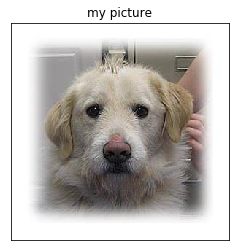

[[0.]]


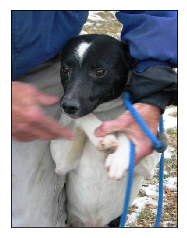

[[0.]]
it's a cat


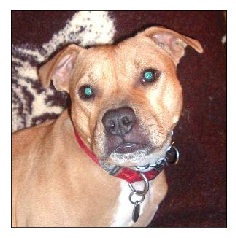

[[1.]]
it's a dog


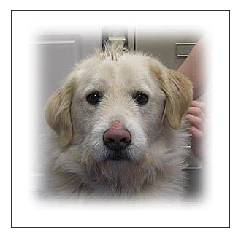

[[0.]]
it's a cat


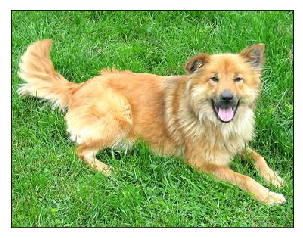

[[1.]]
it's a dog


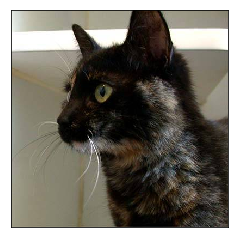

[[0.]]
it's a cat


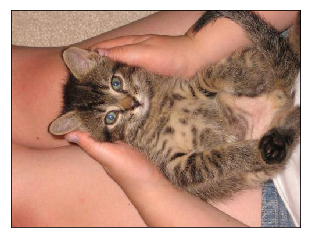

[[0.]]
it's a cat


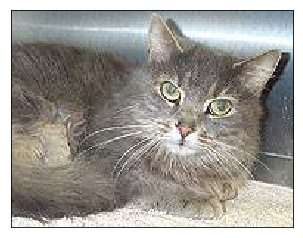

[[0.]]
it's a cat


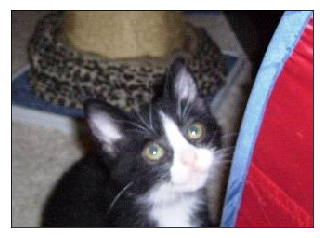

[[1.]]
it's a dog


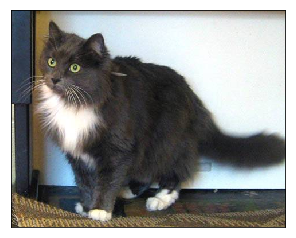

[[1.]]
it's a dog


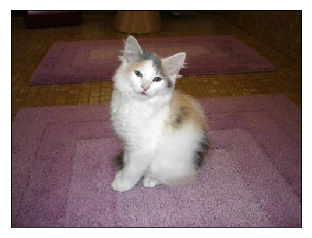

[[0.]]
it's a cat


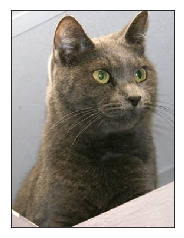

[[0.]]
it's a cat


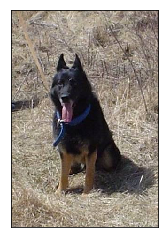

[[1.]]
it's a dog


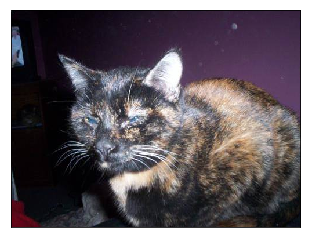

[[0.]]
it's a cat


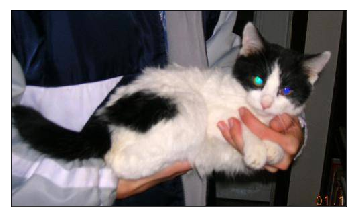

[[1.]]
it's a dog


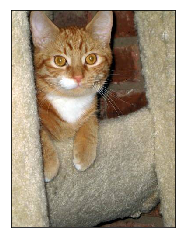

[[0.]]
it's a cat


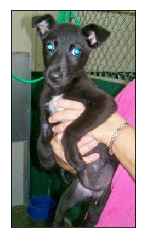

[[9.416303e-31]]
it's a cat


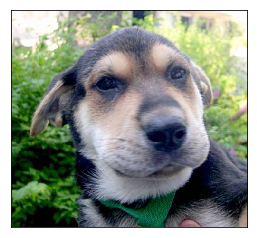

[[1.]]
it's a dog


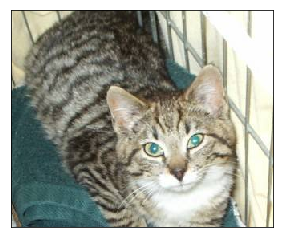

[[0.9993181]]
it's a dog


In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#to display image on jupternotebook in gray
"""img = cv2.imread("catdog/test2/6.jpg")
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()"""
#____________________________________________________________________________#

#to display image on a window
"""img = cv2.imread("catdog/test2/6.jpg")
cv2.imshow('image',img)
cv2.waitKey()"""

#____________________________________________________________________________#

#to display image on jupyternotebook with color
#Matplot lib expects img in RGB format but OpenCV provides it in BGR.
img = cv2.imread("catdog/test2/3.jpg")
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)
plt.title('my picture')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

#for prediction
img = cv2.resize(img,(150,150))
img = img.reshape(1,150,150,3)
print(loaded_model.predict(img))



for i in range(20):
    path = 'catdog/test2/'+str(i)+'.jpg'
    img = cv2.imread(path)
    
    try:    #when [i].jpg image doesn't exist in the tes2 folder
        RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
        continue
        
    plt.imshow(RGB_im)
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()
    img = cv2.resize(img,(150,150))
    img = img.reshape(1,150,150,3)
    print(loaded_model.predict(img))
    if (loaded_model.predict(img).tolist()[0][0]<0.5): print("it's a cat") #0 for cat, 1 for dog
    else: print("it's a dog")
    #print(loaded_model.predict(img))